# Project:  Wrangle and Analyze Twitter Data
<hr style="border:1px solid gray"> </hr>

## Table of Contents

* ### [Introduction](#intro)
* ### [Gathering Data](#gather)
* ### [Assessing Data](#assess)
* ### [Cleaning Data](#clean)
* ### [ Analyzing and Visualizing Data](#anaylze_vis)  

    * [Research Question 1](#question1)
    * [Research Question 2](#question2)
    * [Research Question 3](#question3)


* ### [Conclusion](#conclusion)


<a id='intro'></a>
## Introduction

In this project we'll work through the entire Data wrangling and Analysis process, starting from gathering the right pieces of data from a variety of sources and in a variety of formats, assessing its quality and tidiness, then cleaning it.
<br>

We will wrangle data about [@dog_rates](https://twitter.com/dog_rates) from different sources, [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) is a Twitter account	that rates people's	dogs.

In [5]:
# load libraries
import pandas as pd
import numpy as np
import requests
import re

#twitter api requirement:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

<a id='gather'></a>

## Gathering Data

Download the `twitter_archive_enhanced.csv` manually from Udacity site

In [6]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

Gathering `image_predictions.tsv` programmaticly from given URL

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#fetch the data from url
response = requests.get(url)

# store the response data into tsv file
file_name = 'image_predictions.tsv'
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [7]:
#load image_prediction file into dataframe
df_2 = pd.read_csv('image_predictions.tsv', sep='\t')

Gathering additional Data from Twitter API 

In [ ]:
#twitter API 
consumer_key    = 'HIDDEN'
consumer_secret = 'HIDDEN' 
access_token    = 'HIDDEN'
access_secret   = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

tweet_ids = twitter_archive.tweet_id.values

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# List of dictionaries to build file by file and later convert to a DataFrame

df_list = []
file_name = 'tweet_json.txt'
with open(file_name) as json_file:
    for line in json_file:
        data = json.loads(line)
    # get tweet_id, retweet_count, favorite_count for each tweet in json_file
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
    # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
        
df_3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

>Resources: 
- [reading and writing json to a file in python](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)
- [python api get_status in tweepy](https://www.geeksforgeeks.org/python-api-get_status-in-tweepy/)


In [ ]:
#Store data into csv file
df_3.to_csv("json_data.csv", index=False)

In [8]:
#read data from csv file
df_3 = pd.read_csv('json_data.csv')

> #### Dataframes are named as follow to minimize lines of code and imporve readibility.  
>
> - *df_1* : twitter-archive-enhanced.csv  
> - *df_2* : image_predictions.tsv  
> - *df_3* : json_data.csv 

<a id='assess'></a>

# Assessing Data

### 1. Visual assessment

In [9]:
df_1.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df_2.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
df_3.head(50)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7630,35930
1,892177421306343426,5643,30999
2,891815181378084864,3740,23318
3,891689557279858688,7800,39212
4,891327558926688256,8395,37457
5,891087950875897856,2819,18879
6,890971913173991426,1835,10964
7,890729181411237888,17030,60517
8,890609185150312448,3878,25970
9,890240255349198849,6633,29665


### 2. Programmatic assessment

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_1.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
             ... 
incredibly      1
Brockly         1
Mabel           1
Goose           1
Aja             1
Name: name, Length: 957, dtype: int64

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [19]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2678.276705,7504.349206
std,6.823170e+16,4528.778646,11649.196731
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,542.000000,1306.500000
50%,7.182469e+17,1255.000000,3263.000000
75%,7.986692e+17,3113.500000,9191.000000
max,8.924206e+17,76994.000000,154957.000000


### Quality
#### `twitter-archive-enhanced.csv`  *df_1* table
1. Erroneous data types in multiple columns:
> ids columns should be int data type **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id** instead of float.  
> rating columns should be float data type **rating_numerator, rating_denumerator** instead of int. 
2. **timestamp, retweeted_status_timestamp** have trainlling zeros at the end ( +0000) and should be datetime data type instead of string object.
3. Tweet text contain url at the end.
4. Null values represented as 'None' in **name,doggo, floofer, pupper and puppo** columns.
    > Missing data should be Nan instead of empty string in **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp**. 
5. **rating_denumerator** have value different than 10.
6. **name** column contains several values that are not dog names e.g: like 'a', 'the', 'such'.
7. Some tweets are retweets or not dog rating (tweets that are not related to dogs will be adressed in in tidiness issues)

##### `image_predictions.tsv`  *df_2* table
8. **p1, p2, p3** columns have names in different letter cases (i.e: capitalized, lowercased).
9. Some predictions are not accurate, e.g: it predicts is dog but its not or the opposite.

### Tidiness
1. Four columns are values(doggo, floofer, pupper, puppo) should be in one column like dog_stages in *df_1* table.  
2. *df_2, df_3* table should be part of *df_1* to form one complete table.

<a id='clean'></a>

# Cleaning Data

> #### Dataframes are named as follow to minimize lines of code and imporve readibility.  
>
> - *df_1* : twitter-archive-enhanced.csv  
> - *df_2* : image_predictions.tsv  
> - *df_3* : json_data.csv 

In [20]:
#make copy of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### Quality
`twitter-archive-enhanced.csv` or *df_1_clean*

1. **Erroneous data types in multiple columns:**
>**ids columns should be int data type in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id instead of float.  
> rating columns should be float data type rating_numerator, rating_denumerator instead of int.**

#### Define

Convert id columns to int and rating columns to float

#### Code

In [21]:
#create funciton to convert data typ of df columns
def convert_dtype(df, columns, to_dtype):
    """
    convert the data type of one or multiple columns in Dataframe
    
    @args:
    df: pandas dataframe
    columns: list of colums to convert
    to_dtype: data type of converstion
    
    Return:
    None
    
    """
    for c in columns:
        df[c] = df[c].astype(to_dtype)
    return None

In [22]:
#convert columns to int
df_1_int_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']
convert_dtype(df_1_clean, df_1_int_columns, 'Int64')

In [23]:
#convert columns to float
df_1_float_columns = ['rating_numerator','rating_denominator']
convert_dtype(df_1_clean, df_1_float_columns, 'float64')

#### Test

In [24]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     Int64  
 2   in_reply_to_user_id         78 non-null     Int64  
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    Int64  
 7   retweeted_status_user_id    181 non-null    Int64  
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

2. **timestamp, retweeted_status_timestamp have trainlling zeros at the end ( +0000) and should be datetime data type instead of string object**.

#### Define

Remove trailing ( +0000) from **timestamp,retweeted_status_timestamp** using string slicing,then convert them to datetime data type.

#### Code

In [25]:
#remove last 6 chars, then to datetime in one line then convert to datetime
df_1_clean[['timestamp','retweeted_status_timestamp']] = df_1_clean[['timestamp','retweeted_status_timestamp']].applymap\
                                                        (lambda x :pd.to_datetime(str(x)[:-6]))

#### Test

In [27]:
df_1_clean[['timestamp','retweeted_status_timestamp']].sample(10)

,timestamp,retweeted_status_timestamp
1403,2016-02-16 02:04:04,NaT
1029,2016-06-22 20:18:30,NaT
854,2016-08-15 16:22:20,NaT
1236,2016-03-23 00:37:48,NaT
1080,2016-06-04 00:32:32,NaT
1556,2016-01-17 21:01:41,NaT
292,2017-03-04 17:49:08,NaT
325,2017-02-21 02:17:06,NaT
21,2017-07-19 16:06:48,NaT
425,2017-01-17 18:17:58,2016-10-01 19:47:08


>**Note**: NaT represents missing values is datetime data type

In [28]:
df_1_clean.retweeted_status_timestamp.value_counts()

2016-10-03 15:42:44    1
2016-02-21 01:19:47    1
2016-06-05 19:47:03    1
2016-09-02 18:03:10    1
2017-01-06 17:33:29    1
                      ..
2016-12-17 00:38:52    1
2016-10-06 15:49:14    1
2017-06-08 03:32:35    1
2017-02-14 23:43:18    1
2017-02-16 23:23:38    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

3. **Tweet text contains url at the end**


#### Define

Remove the url from the end of text using regular expression

#### Code

In [29]:
#create funciton to remove url from tweets
def remove_url_from_text(text):
    """
    remove url from end of tweet text
    
    Args:
    text: string
    
    Return:
    same string without url 
    
    """
    return re.sub(r'http\S+','', text, flags=re.MULTILINE)
    
#call the function on text column of df_1
df_1_clean.text = df_1_clean.text.apply(remove_url_from_text)

#### Test

In [30]:
#check if any text contain 'http' 
df_1_clean.text.str.contains('https').sum()

0

In [31]:
#check if any text contain 'https' 
df_1_clean[df_1_clean.text.str.contains('https')].text.values

array([], dtype=object)

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

4. **Null values represented as 'None' in name,doggo, floofer, pupper and puppo columns.** 
> **Missing data should be Nan instead of empty string in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp**

#### Define

Replace `None` and 'None' with Nan using [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) function

#### Code

In [32]:
#replace None,'None' with Nan
df_1_clean.replace(to_replace=[None,'None'], value=np.nan, inplace=True)

#### Test

In [33]:
df_1_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
215,851224888060895234,<NA>,<NA>,2017-04-10 00:06:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/851224888...,13.0,10.0,Snoop,NaN,NaN,NaN,NaN
1746,679132435750195208,<NA>,<NA>,2015-12-22 02:52:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a river dancer. His friend...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/679132435...,10.0,10.0,Louis,NaN,NaN,NaN,NaN
1621,684926975086034944,<NA>,<NA>,2016-01-07 02:38:10,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/684926975...,11.0,10.0,Bruiser,NaN,NaN,NaN,NaN
328,833722901757046785,<NA>,<NA>,2017-02-20 17:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/833722901...,13.0,10.0,Bronte,NaN,NaN,NaN,NaN
2105,670474236058800128,<NA>,<NA>,2015-11-28 05:28:09,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Great teeth. Nice horn...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/670474236...,10.0,10.0,NaN,NaN,NaN,NaN,NaN
321,834209720923721728,<NA>,<NA>,2017-02-22 01:14:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/834209720...,12.0,10.0,Wilson,NaN,NaN,NaN,NaN
2176,669203728096960512,<NA>,<NA>,2015-11-24 17:19:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Samsom. He is sexually confused. Reall...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/669203728...,9.0,10.0,Samsom,NaN,NaN,NaN,NaN
1085,738184450748633089,<NA>,<NA>,2016-06-02 01:44:22,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, we only rate dogs. Pls stop...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/738184450...,9.0,10.0,NaN,NaN,NaN,NaN,NaN
1139,728015554473250816,<NA>,<NA>,2016-05-05 00:16:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/728015554...,11.0,10.0,Rueben,NaN,NaN,pupper,NaN
1059,741743634094141440,<NA>,<NA>,2016-06-11 21:27:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Aqua. She's a sandy pupper. Not sure how ...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/741743634...,11.0,10.0,Aqua,NaN,NaN,pupper,NaN


<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

5. **Rating denumerator have value different than 10**

#### Define

fix denomerator values to 10

#### Code

In [34]:
#set denominator to 10 for all rows
df_1_clean.rating_denominator = 10.

#### Test

In [35]:
df_1_clean.rating_denominator.value_counts()

10.0    2356
Name: rating_denominator, dtype: int64

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

6. **Name column contain several values that are not dog names e.g: 'like' 'a', 'the', 'such'**

#### Define 

Replace all names that have the first letter in lowercase with nan

#### Code

In [36]:
#select all lowercase names into mask
mask = df_1_clean.name.str.islower().fillna(False)
column_name = 'name'
#replace then with Nan
df_1_clean.loc[mask, column_name] = np.nan

#### Test

In [37]:
df_1_clean[df_1_clean['name'].str[0].str.islower().fillna(False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

7. **Some tweets are retweets or not related to dog ratings**

#### Define

Remove all rows that are retweets or not dog ratings.  
* All retweets share a common pattern which is the *retweeted_status_id* is not `Nan` so we can drop rows that meet that condition.
* Tweets that are not related to dog rating are more complicated since there is no pattern to recognize them all programmatically, and removing them manually is not efficient.Moreover, these ratings can be removed when we address the tidiness issue (joining all tables together)

#### Code

In [38]:
#store all the indexes of rows where retweeted_status_id is not null into a list
retweet_index_list = df_1_clean.loc[df_1_clean.retweeted_status_id.notnull()].index

In [39]:
#drop rows by index list
df_1_clean.drop(retweet_index_list, inplace=True)

#### Test

In [40]:
df_1_clean.loc[df_1_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

8. **p1, p2, p3 columns have names in different letter cases (i.e: capitalized, lowercased)**

#### Define

Lowercase Prediction name columns

#### Code

In [41]:
#iterate through list of columns and apply lower function on each column
preds_columns = ['p1','p2','p3']
for c in preds_columns:
    df_2_clean[c] = df_2_clean[c].map(lambda x: x.lower())

#### Test

In [42]:
#store all prediction into a list
all_prediction_list= df_2_clean.p1.values + df_2_clean.p2.values + df_2_clean.p2.values

#check if any of the element of list is uppercase
any(x.isupper() for x in all_prediction_list)

False

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

`image_predictions.tsv` or *df_2_clean*

9. **Some predictions are not accurate, e.g: it predicts is dog but its not or the opposite**

#### Define

Derive a *dog_breed* column from the p1,p2,p3 based on p1_dog, p2_dog, p3_dog values using sing [np.select](https://stackoverflow.com/a/57409273/12492821) methode:   
>if p1_dog is True dog_breed = p1  
>if p2_dog is True dog_breed = p2  
>if p3_dog is True dog_breed = p3  
>else dog_breed = Nan

#### Code

In [43]:
df_2_clean['dog_breed'] = np.select([df_2_clean.p1_dog == True, df_2_clean.p2_dog == True, df_2_clean.p3_dog == True],\
                                    (df_2_clean.p1, df_2_clean.p2, df_2_clean.p3),\
                                    default=np.nan)

#### Test

In [44]:
df_2_clean.dog_breed.value_counts()

golden_retriever      173
labrador_retriever    113
pembroke               96
chihuahua              95
pug                    65
                     ... 
entlebucher             1
scotch_terrier          1
silky_terrier           1
clumber                 1
japanese_spaniel        1
Name: dog_breed, Length: 113, dtype: int64

### Tidiness
#### `twitter-archive-enahnce.csv` or *df_1* table

1. **Four columns are values *doggo, floofer, pupper, puppo* should be in one column `dog_stages`**

#### Define

Aggregate all the four column values in one column *dog_stages*

#### Code

In [45]:
#join four column into one with no separator and replace Nan with empty string
df_1_clean['dog_stages'] =  df_1_clean['doggo'].str.cat(df_1_clean[['floofer', 'pupper', 'puppo']], sep='', na_rep='')

In [46]:
# handle multiple stages
df_1_clean.loc[df_1_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo,pupper'
df_1_clean.loc[df_1_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo,puppo'
df_1_clean.loc[df_1_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo,floofer'

In [47]:
# handle missing values
df_1_clean.loc[df_1_clean.dog_stages == '', 'dog_stages'] = np.nan

#### Test

In [48]:
df_1_clean.dog_stages.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

**df_1_clean, df_2_clean, df_3_clean should be part of the df_1_clean `twitter_archive_master` table.**

#### Define

Join all three tables in one using tweet_id and merge function

#### Code

In [49]:
#join three datasets into one dataset
df_master = df_1_clean.set_index('tweet_id').join\
                        (df_2_clean.set_index('tweet_id'), on='tweet_id', how='inner').join\
                        (df_3_clean.set_index('tweet_id'), on='tweet_id', how='inner')
#using inner join mean take only tweets that are in both tables at time, this will prevent have Nan in twitter master

#### Test

In [50]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 892420643555336193 to 666020888022790149
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   in_reply_to_status_id       23 non-null     Int64         
 1   in_reply_to_user_id         23 non-null     Int64         
 2   timestamp                   1987 non-null   datetime64[ns]
 3   source                      1987 non-null   object        
 4   text                        1987 non-null   object        
 5   retweeted_status_id         0 non-null      Int64         
 6   retweeted_status_user_id    0 non-null      Int64         
 7   retweeted_status_timestamp  0 non-null      datetime64[ns]
 8   expanded_urls               1987 non-null   object        
 9   rating_numerator            1987 non-null   float64       
 10  rating_denominator          1987 non-null   float64       
 11  name                     

In [51]:
df_master.duplicated().sum()

0

In [52]:
df_master.shape

(1987, 31)

>One last step we can take is to drop off all columns that we won't need to analyze and visualize out data

In [53]:
#drop any column that isn't nessecary
drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source','retweeted_status_id', 'retweeted_status_user_id',\
             'retweeted_status_timestamp','expanded_urls','jpg_url','doggo','floofer','pupper','puppo',\
             'img_num','p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog']
df_master.drop(drop_cols, axis=1, inplace=True)

## Store Dataset 

In [54]:
#store the final table into csv file.
df_master.to_csv("twitter_archive_master.csv", index=False)

<br />
<br />
<br />
<center> this cell is left intentionally blank </center>
<br />
<br />
<br />

<a id='anaylze_vis'></a>

## Analyzing and Visualizing 

### Exploratory Data Analysis

#### Features description

> * `tweet_id`: the unique id of each tweet.
* `timestamp`: date and time when tweet posted.
* `text`: the corresponding tweet text.
* `rating_numerator` : the given rating numerator.
* `rating_denomirator`: the given rating denomirator.
* `name`: name of the dog in the tweet.
* `dog_stages`: the corresponding dog stage of the tweeted dog (doggo,pooper,floofer,puppo)
* `dog_breed`: the predicted dog breed from tweet photo.
* `retweet_count`: count of retweet of the tweet.
* `favorite_count`: tweet like count.

#### Questions
>1. How does the ratings affect the likes/retweets count?   
>2. Most frequent words in tweets?
>3. Top rated dog breeds by average favorite_count and retweet_count?

In [55]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [56]:
df_master_copy = df_master.copy()
df_master_copy.head()

,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,dog_breed,retweet_count,favorite_count
0,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,7630,35930
1,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,chihuahua,5643,30999
2,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,chihuahua,3740,23318
3,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,labrador_retriever,7800,39212
4,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,basset,8395,37457


<a id='question1'></a>

#### Research Question 1 (Do dog rating affects with likes/retweets count?)

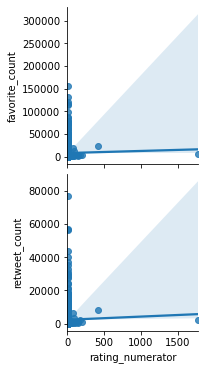

In [57]:
sns.pairplot(data=df_master_copy,
             x_vars=['rating_numerator'],
             y_vars=['favorite_count', 'retweet_count'],
             kind='reg');

The above plots Shows that **correlation** between rating_numerator and favorite_count/retweet_count is **very weak.**

<a id='question2'></a>

#### Research Question 2 (Most frequent words in tweets?)

In [64]:
#create a function to plot word cloud
def plot_word_cloud(mask, text, stop_words, width, height):
    """
    generate word cloud of text data
    Args:
    dog_mask: nd-array
              gives a binary mask on where to draw words
              
    text: text data
    stop_wrds: The words that will be eliminated. If None, the build-in STOPWORDS
                list will be used.
                
    width: Width of the canvas.
    height: Height of the canvas.
    
    Return:
    None
    """
    #set the figure size
    plt.figure(figsize = (10,10))
    
    #set stopwords
    stopwords = set(STOPWORDS)
    #set stopwords
    stopwords.update(stop_words)
    
    # Instantiate word cloud object
    wc = WordCloud(max_font_size=None, background_color='white',mask=mask, stopwords=stopwords ,width=width, height=height)

    # Generate word cloud
    wc.generate(text)

    # Show word cloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.figure()
    plt.axis('off')
    plt.show();

    

In [65]:
#set text,mask and stop words
text = ' '.join(df_master_copy['text'].str.lower().values)
dog_mask = np.array(Image.open("img/silhoutte.jpg"))
stop_wrds = set(["this", "to", "as", "af","hi","she","he"])

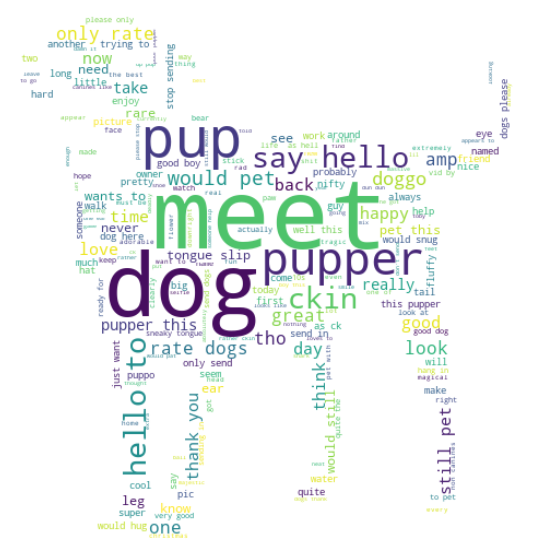

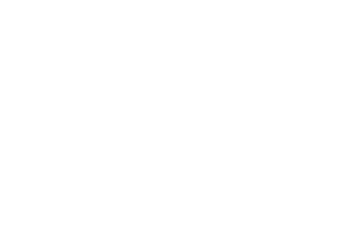

In [67]:
#plot word cloud
plot_word_cloud(dog_mask, text, stop_words=stop_wrds, width=900, height=800)

This Word Cloud image shows the most frequent words in **WeRateDogs** tweets, without any doubt the word **dog** is there.

<a id='question3'></a>

#### Research Question 3 (Top ranked dogs by ratings,likes and retweets?)

In [68]:
#name and breed of top rated dog 
df_master_copy.sort_values(by='rating_numerator',ascending=False)[['name','dog_breed','rating_numerator']].head(1)

,name,dog_breed,rating_numerator
720,Atticus,NaN,1776.0


The top rated dog with 1776 rating is **Atticus** 

In [69]:
#Most liked/retweeted dogs
df_master_copy.sort_values(by=['favorite_count','retweet_count'],ascending=(False,False), na_position='last')[['name','dog_breed','favorite_count','retweet_count']].head(10)

,name,dog_breed,favorite_count,retweet_count
769,NaN,labrador_retriever,154957,76994
305,NaN,lakeland_terrier,132124,43413
396,Stephan,chihuahua,119682,56117
107,Jamesy,french_bulldog,115649,32642
804,NaN,eskimo_dog,114553,57196
58,Duddles,english_springer,98591,40261
329,Bo,standard_poodle,87518,37110
134,NaN,malamute,85875,28393
92,Zoey,golden_retriever,78096,24345
1417,NaN,bedlington_terrier,77741,31007


A **Labrador_retriever** dog  made highest likes with 154957 favorite_count and retweets with 76994 retweet_count.

In [70]:
#Most liked/retweeted dog breed
data = df_master_copy.groupby(['dog_breed'])[['favorite_count','retweet_count']]\
                      .sum().iloc[:10,].sort_values(['favorite_count','retweet_count'],ascending=(False,False))

In [71]:
#create a function to plot horizental bar graph
def plot_barh(data,title,xlabel,ylabel):
    """
    plot horizental bar graph
    Args:
    data: pd.dataframe
                      
    title: plot title
    xlabel: x-axis label
                
    ylabel: y-axis label
    
    Return:
    None
    """
    data.plot(kind= 'barh',figsize = (13,6),fontsize=12)
    #set the title and labels
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel,fontsize= 13)
    plt.ylabel(ylabel,fontsize= 13)
    plt.show();

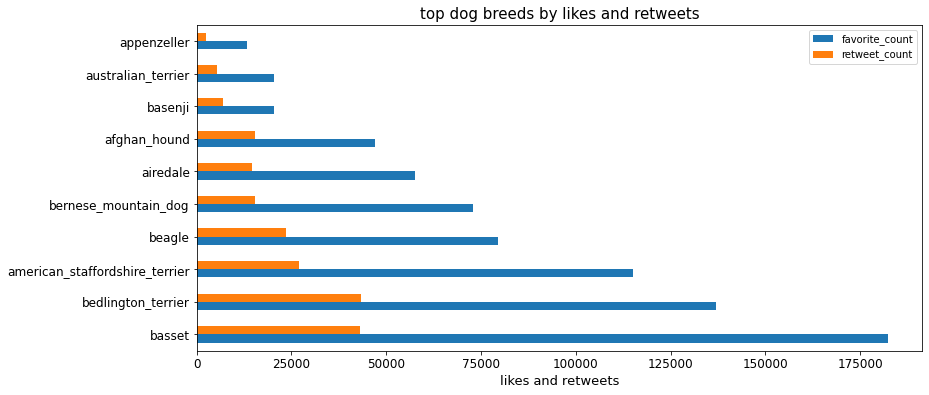

In [72]:
#plot horizental bar plot
title = 'top dog breeds by likes and retweets'
xlabel = 'likes and retweets'
ylabel = ''
plot_barh(data, title, xlabel, ylabel)

> **From the bar plot above we can identify which top 10 dog breed made highest twitter engagemnt:**
- **Basset** dogs are in first place with 175k sum of likes and 40k sum of retweets.
- **Bedlington_terrier** dogs made second highest sum of likes 138k and sum of likes and 40k sum of retweets.
- **American_staffordshire_terrier** made the third sum of likes 120k and sum of likes and 28k sum of retweets.

<a id='conclusion'></a>

### Conclusion

In this project we discovred the whole **From Data to Insights** process, starting From Data wrangling, Assessing, Cleaning To extracting insight from this data.  

**Note that This Analysis is limited with the data provided from Twitter and the informations we have got can not be generalized to other use cases.**